In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns',500)
color_pal=plt.rcParams["axes.prop_cycle"].by_key()['color']
import plotly.express as px
from fredapi import Fred

fred_key='2f045d9bb7bda4e10ef5db1a80776c07'

In [3]:
#Create the fred object
fred=Fred(api_key=fred_key)

Let's get familiar with the API first.

In [4]:
#Search for economic data
sp_search=fred.search('S&P', order_by='popularity')

In [5]:
#sp_search.shape
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-05-19,2023-05-19,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-05-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-05-19 09:21:06-05:00,95,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-05-19,2023-05-19,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-02-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-04-25 08:13:02-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-05-19,2023-05-19,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-05-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-05-19 09:21:11-05:00,83,This data represents the effective yield of th...
SP500,SP500,2023-05-19,2023-05-19,S&P 500,2013-05-20,2023-05-19,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-05-19 19:13:26-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-05-19,2023-05-19,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,80,Household data are collected as of March. As ...


In [6]:
#Pull raw data
sp500=fred.get_series('SP500')

In [8]:
sp500.head()

2013-05-20    1666.29
2013-05-21    1669.16
2013-05-22    1655.35
2013-05-23    1650.51
2013-05-24    1649.60
dtype: float64

<AxesSubplot: title={'center': 'S&P500'}>

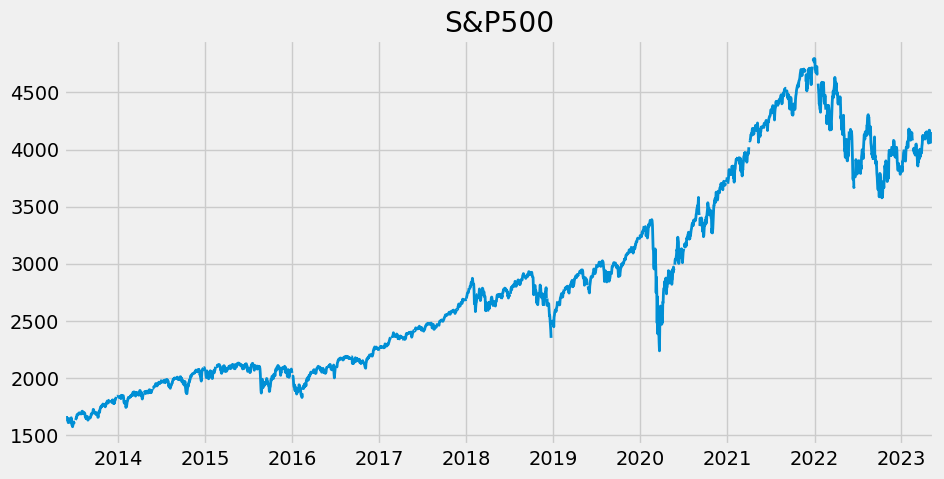

In [7]:
sp500.plot(figsize=(10,5),title="S&P500",lw=2)

Now Let's start pulling Unemployment Data and derive some insights.

In [9]:
#Pull and join Multiple Data Series
uemp_results=fred.search("unemployment")

In [12]:
uemp_results.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-05-19,2023-05-19,Unemployment Rate,1948-01-01,2023-04-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-05-05 07:44:02-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-05-19,2023-05-19,Unemployment Rate,1948-01-01,2023-04-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-05-05 07:43:02-05:00,57,The unemployment rate represents the number of...
CCSA,CCSA,2023-05-19,2023-05-19,Continued Claims (Insured Unemployment),1967-01-07,2023-05-06,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-05-18 07:33:05-05:00,76,"Continued claims, also referred to as insured ..."
NROU,NROU,2023-05-19,2023-05-19,Noncyclical Rate of Unemployment,1949-01-01,2033-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-03-21 15:19:03-05:00,69,"Starting with the July, 2021 report: An Update..."
CCNSA,CCNSA,2023-05-19,2023-05-19,Continued Claims (Insured Unemployment),1967-01-07,2023-05-06,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2023-05-18 07:33:09-05:00,33,"Continued claims, also referred to as insured ..."


In [13]:
#Let's Pull seasonally adjusted data with series_id=UNRATE
unrate=fred.get_series('UNRATE')
unrate.head()

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
dtype: float64

<AxesSubplot: >

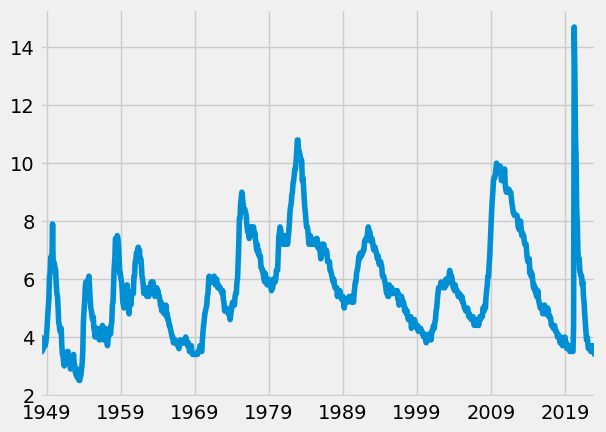

In [14]:
unrate.plot()

In [336]:
uemp_results.head()

,CAUR,FLUR,NYUR,TXUR,OHUR,PAUR,ILUR,MAUR,MIUR,WIUR,NCUR,ALUR,TNUR,COUR,VAUR,MNUR,GAUR,KYUR,SCUR,ORUR,INUR,WAUR,NMUR,AKUR,MOUR,NVUR,IAUR,OKUR,AZUR,NJUR,WVUR,ARUR,UTUR,CTUR,LAUR,MDUR,NDUR,WYUR,PRUR,DCUR,RIUR,NEUR,MSUR,KSUR,NHUR,HIUR,SDUR,MTUR,DEUR,IDUR,MEUR,VTUR
1976-01-01,9.2,9.7,10.3,5.8,8.1,8.0,6.6,10.5,9.9,5.8,6.4,6.6,6.0,5.8,6.1,6.0,8.4,5.6,7.4,9.5,6.6,8.5,8.6,7.1,5.9,9.2,4.3,5.8,10.2,10.3,7.5,7.3,5.8,9.8,6.3,6.4,3.4,4.1,19.6,8.7,7.8,3.3,6.7,4.2,6.5,9.8,3.3,5.8,8.0,5.6,8.7,8.6
1976-02-01,9.2,9.7,10.3,5.8,8.1,8.1,6.6,10.5,9.9,5.8,6.4,6.6,6.0,5.7,6.1,6.0,8.4,5.6,7.4,9.5,6.6,8.5,8.7,7.1,5.9,9.2,4.3,5.8,10.2,10.3,7.5,7.3,5.9,9.8,6.3,6.4,3.4,4.1,19.5,8.7,7.8,3.3,6.7,4.2,6.5,9.8,3.3,5.8,8.0,5.6,8.7,8.6
1976-03-01,9.1,9.6,10.2,5.9,8.1,8.1,6.6,10.5,9.9,5.7,6.4,6.6,6.0,5.7,6.1,5.9,8.4,5.6,7.3,9.4,6.5,8.4,8.7,7.0,5.9,9.2,4.3,5.8,10.1,10.3,7.5,7.3,5.8,9.8,6.3,6.4,3.4,4.1,19.3,8.6,7.7,3.3,6.6,4.2,6.5,9.8,3.2,5.8,8.0,5.6,8.6,8.6
1976-04-01,9.1,9.5,10.2,5.9,8.0,8.1,6.6,10.3,9.8,5.6,6.3,6.5,6.0,5.6,6.0,5.8,8.3,5.6,7.2,9.2,6.3,8.5,8.6,6.9,6.0,9.0,4.2,5.8,10.0,10.3,7.5,7.2,5.8,9.6,6.4,6.4,3.5,4.0,19.0,8.5,7.7,3.2,6.4,4.2,6.5,9.7,3.1,5.8,8.1,5.6,8.6,8.6
1976-05-01,9.0,9.3,10.1,5.9,7.8,8.1,6.6,10.1,9.6,5.5,6.1,6.4,5.9,5.6,5.9,5.7,8.1,5.5,7.0,9.1,6.0,8.5,8.6,6.9,6.0,8.9,4.1,5.7,9.8,10.3,7.4,7.1,5.7,9.4,6.5,6.5,3.6,3.9,18.9,8.4,7.7,3.1,6.3,4.2,6.5,9.4,3.1,5.8,8.3,5.6,8.5,8.5


In [337]:
fred.search('unemployment state').tail()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
PEUCCCWA,PEUCCCWA,2023-05-20,2023-05-20,Pandemic Emergency Unemployment Compensation C...,2020-03-28,2022-10-22,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2022-11-14 07:33:36-06:00,3,"Continued claims, also referred to as insured ..."
WASKAG5URN,WASKAG5URN,2023-05-20,2023-05-20,"Unemployment Rate in Skagit County, WA",1990-01-01,2023-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-05-03 10:11:06-05:00,3,These data come from the Current Population Su...
WAFERR9URN,WAFERR9URN,2023-05-20,2023-05-20,"Unemployment Rate in Ferry County, WA",1990-01-01,2023-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-05-03 10:19:25-05:00,3,These data come from the Current Population Su...
PHIL942UR,PHIL942UR,2023-05-20,2023-05-20,Unemployment Rate in Philadelphia-Camden-Wilmi...,1990-01-01,2023-03-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2023-05-03 13:32:09-05:00,1,None
LAUMT423798000000003A,LAUMT423798000000003A,2023-05-20,2023-05-20,Unemployment Rate in Philadelphia-Camden-Wilmi...,1990-01-01,2022-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2023-05-03 10:36:11-05:00,1,None


In [113]:
uemp_df=fred.search('unemployment rate for state',filter=('frequency','Monthly'))
uemp_df=uemp_df.query('seasonal_adjustment=="Seasonally Adjusted" and units=="Percent"')
uemp_df=uemp_df.loc[uemp_df['title'].str.contains('Unemployment Rate in')]

In [160]:
uemp_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2023-05-20,2023-05-20,Unemployment Rate in California,1976-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-05-01 10:47:01-05:00,59,None
FLUR,FLUR,2023-05-20,2023-05-20,Unemployment Rate in Florida,1976-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-05-01 10:47:03-05:00,52,None
NYUR,NYUR,2023-05-20,2023-05-20,Unemployment Rate in New York,1976-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-05-01 10:47:03-05:00,51,None
TXUR,TXUR,2023-05-20,2023-05-20,Unemployment Rate in Texas,1976-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-05-01 10:46:02-05:00,50,None
OHUR,OHUR,2023-05-20,2023-05-20,Unemployment Rate in Ohio,1976-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-05-01 10:47:04-05:00,41,None


In [118]:
uemp_df.shape

(59, 15)

In [119]:
all_results=[]
for myid in uemp_df.index :
    results=fred.get_series(myid)
    results=results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(1)

In [121]:
#putting all the data together
pd.concat(all_results,axis=1)

,CAUR,FLUR,NYUR,TXUR,OHUR,PAUR,ILUR,MAUR,MIUR,WIUR,NCUR,ALUR,TNUR,COUR,VAUR,MNUR,GAUR,KYUR,SCUR,ORUR,INUR,WAUR,NMUR,AKUR,MOUR,NVUR,IAUR,OKUR,AZUR,NJUR,WVUR,ARUR,LASMT261982000000003,UTUR,CTUR,LAUR,MDUR,NDUR,WYUR,PRUR,DCUR,RIUR,NEUR,MSUR,KSUR,NHUR,HIUR,SDUR,MTUR,LASMT391746000000003,DEUR,IDUR,CMWRUR,MEUR,VTUR,CSOUUR,CWSTUR,CNEWUR,CNERUR
1976-01-01,9.2,9.7,10.3,5.8,8.1,8.0,6.6,10.5,9.9,5.8,6.4,6.6,6.0,5.8,6.1,6.0,8.4,5.6,7.4,9.5,6.6,8.5,8.6,7.1,5.9,9.2,4.3,5.8,10.2,10.3,7.5,7.3,NaN,5.8,9.8,6.3,6.4,3.4,4.1,19.6,8.7,7.8,3.3,6.7,4.2,6.5,9.8,3.3,5.8,NaN,8.0,5.6,6.8,8.7,8.6,6.9,8.6,9.6,9.6
1976-02-01,9.2,9.7,10.3,5.8,8.1,8.1,6.6,10.5,9.9,5.8,6.4,6.6,6.0,5.7,6.1,6.0,8.4,5.6,7.4,9.5,6.6,8.5,8.7,7.1,5.9,9.2,4.3,5.8,10.2,10.3,7.5,7.3,NaN,5.9,9.8,6.3,6.4,3.4,4.1,19.5,8.7,7.8,3.3,6.7,4.2,6.5,9.8,3.3,5.8,NaN,8.0,5.6,6.8,8.7,8.6,6.9,8.6,9.6,9.6
1976-03-01,9.1,9.6,10.2,5.9,8.1,8.1,6.6,10.5,9.9,5.7,6.4,6.6,6.0,5.7,6.1,5.9,8.4,5.6,7.3,9.4,6.5,8.4,8.7,7.0,5.9,9.2,4.3,5.8,10.1,10.3,7.5,7.3,NaN,5.8,9.8,6.3,6.4,3.4,4.1,19.3,8.6,7.7,3.3,6.6,4.2,6.5,9.8,3.2,5.8,NaN,8.0,5.6,6.8,8.6,8.6,6.9,8.6,9.6,9.6
1976-04-01,9.1,9.5,10.2,5.9,8.0,8.1,6.6,10.3,9.8,5.6,6.3,6.5,6.0,5.6,6.0,5.8,8.3,5.6,7.2,9.2,6.3,8.5,8.6,6.9,6.0,9.0,4.2,5.8,10.0,10.3,7.5,7.2,NaN,5.8,9.6,6.4,6.4,3.5,4.0,19.0,8.5,7.7,3.2,6.4,4.2,6.5,9.7,3.1,5.8,NaN,8.1,5.6,6.7,8.6,8.6,6.8,8.5,9.4,9.5
1976-05-01,9.0,9.3,10.1,5.9,7.8,8.1,6.6,10.1,9.6,5.5,6.1,6.4,5.9,5.6,5.9,5.7,8.1,5.5,7.0,9.1,6.0,8.5,8.6,6.9,6.0,8.9,4.1,5.7,9.8,10.3,7.4,7.1,NaN,5.7,9.4,6.5,6.5,3.6,3.9,18.9,8.4,7.7,3.1,6.3,4.2,6.5,9.4,3.1,5.8,NaN,8.3,5.6,6.6,8.5,8.5,6.7,8.5,9.3,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,4.1,2.7,4.1,3.8,4.1,4.4,4.6,3.7,4.4,3.0,3.9,2.6,3.5,2.8,3.2,3.0,3.1,3.9,3.3,4.8,3.2,4.6,3.5,3.7,2.7,5.5,3.1,3.2,4.0,3.3,4.1,3.5,3.7,2.4,4.0,3.6,3.1,2.1,3.9,6.0,4.2,3.3,2.7,4.1,2.9,2.9,3.7,2.2,2.7,4.5,4.7,2.8,3.6,3.1,3.1,3.4,4.0,3.6,3.9
2022-12-01,4.1,2.7,4.1,3.8,4.1,4.3,4.6,3.7,4.3,3.0,3.8,2.6,3.5,2.8,3.1,2.9,3.1,3.9,3.3,4.8,3.1,4.5,3.5,3.7,2.7,5.5,3.0,3.2,4.0,3.3,4.1,3.4,3.7,2.4,4.0,3.5,3.0,2.1,3.9,6.0,4.2,3.2,2.7,4.0,2.9,2.9,3.7,2.2,2.6,4.5,4.6,2.8,3.6,3.1,3.0,3.4,4.0,3.5,3.9
2023-01-01,4.2,2.6,4.2,3.9,4.0,4.3,4.5,3.5,4.3,2.9,3.8,2.6,3.5,2.8,3.2,2.9,3.1,3.9,3.2,4.8,3.1,4.6,3.5,3.8,2.7,5.5,3.0,3.1,3.8,3.4,3.9,3.4,3.8,2.4,3.9,3.5,3.0,2.1,3.9,6.0,4.5,3.1,2.5,3.9,2.9,2.8,3.6,2.1,2.5,4.3,4.6,2.7,3.5,2.9,2.9,3.3,4.0,3.5,3.9
2023-02-01,4.4,2.6,4.2,4.0,3.9,4.4,4.5,3.7,4.3,2.7,3.6,2.5,3.5,2.9,3.2,3.0,3.1,3.9,3.2,4.7,3.1,4.6,3.6,3.8,2.6,5.5,2.9,3.0,3.7,3.5,3.7,3.2,3.8,2.4,4.0,3.6,2.9,2.1,3.8,6.0,4.7,3.1,2.3,3.7,2.9,2.7,3.6,2.1,2.4,4.2,4.6,2.6,3.5,2.8,2.8,3.3,4.1,3.5,3.9


In [213]:
#There are some regional data and data that doesn't to belong to a state so I will drop them since they are irrelevant
uemp_states=pd.concat(all_results,axis=1).drop(['LASMT261982000000003','LASMT391746000000003','CNERUR','CNEWUR','CWSTUR','CSOUUR','CMWRUR'], axis=1)

In [214]:
uemp_states

,CAUR,FLUR,NYUR,TXUR,OHUR,PAUR,ILUR,MAUR,MIUR,WIUR,NCUR,ALUR,TNUR,COUR,VAUR,MNUR,GAUR,KYUR,SCUR,ORUR,INUR,WAUR,NMUR,AKUR,MOUR,NVUR,IAUR,OKUR,AZUR,NJUR,WVUR,ARUR,UTUR,CTUR,LAUR,MDUR,NDUR,WYUR,PRUR,DCUR,RIUR,NEUR,MSUR,KSUR,NHUR,HIUR,SDUR,MTUR,DEUR,IDUR,MEUR,VTUR
1976-01-01,9.2,9.7,10.3,5.8,8.1,8.0,6.6,10.5,9.9,5.8,6.4,6.6,6.0,5.8,6.1,6.0,8.4,5.6,7.4,9.5,6.6,8.5,8.6,7.1,5.9,9.2,4.3,5.8,10.2,10.3,7.5,7.3,5.8,9.8,6.3,6.4,3.4,4.1,19.6,8.7,7.8,3.3,6.7,4.2,6.5,9.8,3.3,5.8,8.0,5.6,8.7,8.6
1976-02-01,9.2,9.7,10.3,5.8,8.1,8.1,6.6,10.5,9.9,5.8,6.4,6.6,6.0,5.7,6.1,6.0,8.4,5.6,7.4,9.5,6.6,8.5,8.7,7.1,5.9,9.2,4.3,5.8,10.2,10.3,7.5,7.3,5.9,9.8,6.3,6.4,3.4,4.1,19.5,8.7,7.8,3.3,6.7,4.2,6.5,9.8,3.3,5.8,8.0,5.6,8.7,8.6
1976-03-01,9.1,9.6,10.2,5.9,8.1,8.1,6.6,10.5,9.9,5.7,6.4,6.6,6.0,5.7,6.1,5.9,8.4,5.6,7.3,9.4,6.5,8.4,8.7,7.0,5.9,9.2,4.3,5.8,10.1,10.3,7.5,7.3,5.8,9.8,6.3,6.4,3.4,4.1,19.3,8.6,7.7,3.3,6.6,4.2,6.5,9.8,3.2,5.8,8.0,5.6,8.6,8.6
1976-04-01,9.1,9.5,10.2,5.9,8.0,8.1,6.6,10.3,9.8,5.6,6.3,6.5,6.0,5.6,6.0,5.8,8.3,5.6,7.2,9.2,6.3,8.5,8.6,6.9,6.0,9.0,4.2,5.8,10.0,10.3,7.5,7.2,5.8,9.6,6.4,6.4,3.5,4.0,19.0,8.5,7.7,3.2,6.4,4.2,6.5,9.7,3.1,5.8,8.1,5.6,8.6,8.6
1976-05-01,9.0,9.3,10.1,5.9,7.8,8.1,6.6,10.1,9.6,5.5,6.1,6.4,5.9,5.6,5.9,5.7,8.1,5.5,7.0,9.1,6.0,8.5,8.6,6.9,6.0,8.9,4.1,5.7,9.8,10.3,7.4,7.1,5.7,9.4,6.5,6.5,3.6,3.9,18.9,8.4,7.7,3.1,6.3,4.2,6.5,9.4,3.1,5.8,8.3,5.6,8.5,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,4.1,2.7,4.1,3.8,4.1,4.4,4.6,3.7,4.4,3.0,3.9,2.6,3.5,2.8,3.2,3.0,3.1,3.9,3.3,4.8,3.2,4.6,3.5,3.7,2.7,5.5,3.1,3.2,4.0,3.3,4.1,3.5,2.4,4.0,3.6,3.1,2.1,3.9,6.0,4.2,3.3,2.7,4.1,2.9,2.9,3.7,2.2,2.7,4.7,2.8,3.1,3.1
2022-12-01,4.1,2.7,4.1,3.8,4.1,4.3,4.6,3.7,4.3,3.0,3.8,2.6,3.5,2.8,3.1,2.9,3.1,3.9,3.3,4.8,3.1,4.5,3.5,3.7,2.7,5.5,3.0,3.2,4.0,3.3,4.1,3.4,2.4,4.0,3.5,3.0,2.1,3.9,6.0,4.2,3.2,2.7,4.0,2.9,2.9,3.7,2.2,2.6,4.6,2.8,3.1,3.0
2023-01-01,4.2,2.6,4.2,3.9,4.0,4.3,4.5,3.5,4.3,2.9,3.8,2.6,3.5,2.8,3.2,2.9,3.1,3.9,3.2,4.8,3.1,4.6,3.5,3.8,2.7,5.5,3.0,3.1,3.8,3.4,3.9,3.4,2.4,3.9,3.5,3.0,2.1,3.9,6.0,4.5,3.1,2.5,3.9,2.9,2.8,3.6,2.1,2.5,4.6,2.7,2.9,2.9
2023-02-01,4.4,2.6,4.2,4.0,3.9,4.4,4.5,3.7,4.3,2.7,3.6,2.5,3.5,2.9,3.2,3.0,3.1,3.9,3.2,4.7,3.1,4.6,3.6,3.8,2.6,5.5,2.9,3.0,3.7,3.5,3.7,3.2,2.4,4.0,3.6,2.9,2.1,3.8,6.0,4.7,3.1,2.3,3.7,2.9,2.7,3.6,2.1,2.4,4.6,2.6,2.8,2.8


<AxesSubplot: >

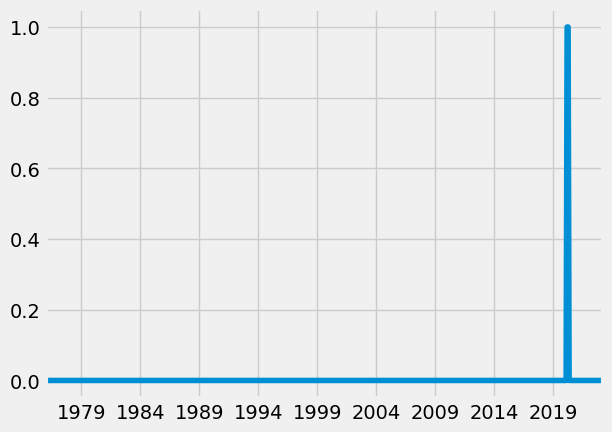

In [215]:
uemp_states.isna().sum(axis=1).plot()

In [216]:
#Removing Nulls and Replacing states' codes to the actual names of the states
uemp_states=uemp_states.dropna()
id_to_state=uemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns=[id_to_state[x] for x in uemp_states.columns]

In [217]:
px.line(uemp_states)

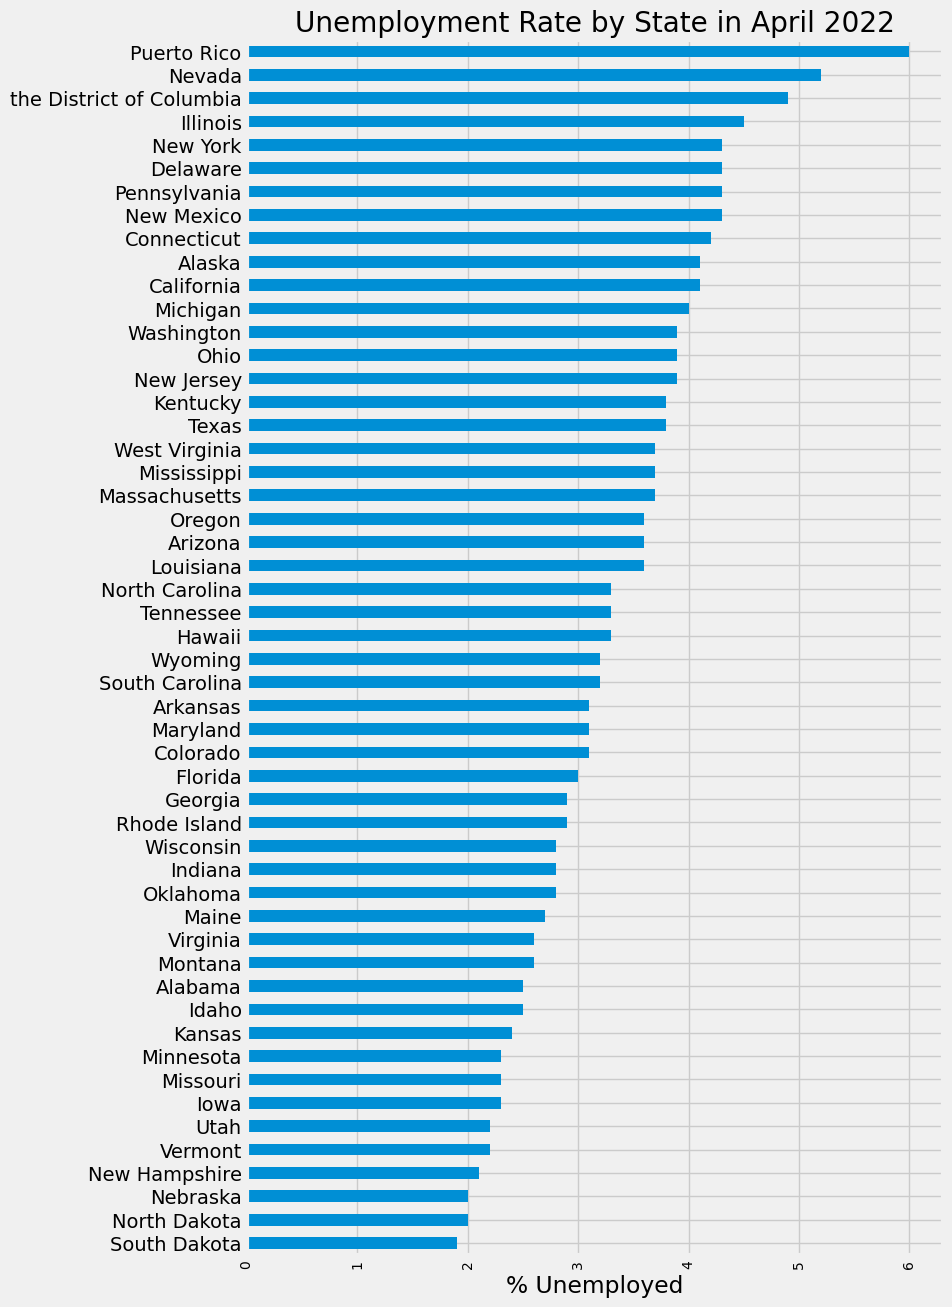

In [218]:
#Let's pull April 2022 Unemployment rate Per State
ax=uemp_states.loc[uemp_states.index=='2022-04-01'].T.sort_values('2022-04-01') \
    .plot(kind='barh', figsize=(8,15), title='Unemployment Rate by State in April 2022')
plt.xticks(fontsize=10, rotation=90)
ax.legend().remove()
ax.set_xlabel("% Unemployed")
plt.show()

Let's pull the Participation data by doing the same thing we did with the Unemployment data. 


Participation Rate represents the percentage of the population working or looking for work. (Active Workforce)

In [219]:
#Participation rate
part_df=fred.search('participation rate state',filter=('frequency','Monthly'))
part_df=part_df.query('seasonal_adjustment=="Seasonally Adjusted" and units=="Percent"')
part_df=part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for')]


In [220]:
part_id_to_state=part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

In [221]:
part_id_to_state

{'LBSSA12': 'Florida',
 'LBSSA06': 'California',
 'LBSSA55': 'Wisconsin',
 'LBSSA01': 'Alabama',
 'LBSSA21': 'Kentucky',
 'LBSSA26': 'Michigan',
 'LBSSA36': 'New York',
 'LBSSA48': 'Texas',
 'LBSSA27': 'Minnesota',
 'LBSSA42': 'Pennsylvania',
 'LBSSA25': 'Massachusetts',
 'LBSSA39': 'Ohio',
 'LBSSA28': 'Mississippi',
 'LBSSA23': 'Maine',
 'LBSSA37': 'North Carolina',
 'LBSSA08': 'Colorado',
 'LBSSA54': 'West Virginia',
 'LBSSA35': 'New Mexico',
 'LBSSA17': 'Illinois',
 'LBSSA40': 'Oklahoma',
 'LBSSA51': 'Virginia',
 'LBSSA29': 'Missouri',
 'LBSSA47': 'Tennessee',
 'LBSSA49': 'Utah',
 'LBSSA13': 'Georgia',
 'LBSSA09': 'Connecticut',
 'LBSSA22': 'Louisiana',
 'LBSSA18': 'Indiana',
 'LBSSA31': 'Nebraska',
 'LBSSA34': 'New Jersey',
 'LBSSA19': 'Iowa',
 'LBSSA02': 'Alaska',
 'LBSSA53': 'Washington',
 'LBSSA45': 'South Carolina',
 'LBSSA41': 'Oregon',
 'LBSSA20': 'Kansas',
 'LBSSA04': 'Arizona',
 'LBSSA24': 'Maryland',
 'LBSSA30': 'Montana',
 'LBSSA38': 'North Dakota',
 'LBSSA16': 'Idaho',
 

In [204]:
all_results_part=[]
for myid in part_df.index :
    results=fred.get_series(myid)
    results=results.to_frame(name=myid)
    all_results_part.append(results)
    time.sleep(1)
part_states=pd.concat(all_results_part,axis=1)

In [208]:
#Changing states' codes to names
part_states.columns=[part_id_to_state[x] for x in part_states.columns]

In [210]:
part_states.head()

,Florida,California,Wisconsin,Alabama,Kentucky,Michigan,New York,Texas,Minnesota,Pennsylvania,Massachusetts,Ohio,Mississippi,Maine,North Carolina,Colorado,West Virginia,New Mexico,Illinois,Oklahoma,Virginia,Missouri,Tennessee,Utah,Georgia,Connecticut,Louisiana,Indiana,Nebraska,New Jersey,Iowa,Alaska,Washington,South Carolina,Oregon,Kansas,Arizona,Maryland,Montana,North Dakota,Idaho,Wyoming,Arkansas,Nevada,South Dakota,Vermont,Delaware,New Hampshire,Hawaii,District Of Columbia,Rhode Island
1976-01-01,55.8,62.6,65.6,57.0,60.5,61.6,58.0,63.8,65.6,58.4,64.8,61.7,58.8,62.1,66.5,67.2,52.5,60.8,63.0,59.3,65.9,60.5,59.6,62.8,63.7,64.2,56.8,64.0,64.9,61.5,64.4,69.0,60.9,65.3,62.9,65.1,59.5,64.3,62.7,62.6,63.0,65.3,57.9,71.3,64.6,63.6,62.7,65.9,69.9,64.4,63.8
1976-02-01,55.7,62.4,65.5,56.9,60.3,61.5,58.0,63.5,65.5,58.3,64.7,61.7,58.6,61.9,66.3,67.0,52.4,60.5,63.0,59.2,65.8,60.3,59.4,62.6,63.6,64.1,56.6,63.9,64.9,61.4,64.3,68.4,60.7,65.2,62.7,65.0,59.2,64.2,62.5,62.4,62.8,64.9,57.8,70.8,64.4,63.4,62.5,65.6,69.6,64.5,63.7
1976-03-01,55.5,62.2,65.4,56.8,60.2,61.5,58.0,63.4,65.4,58.3,64.6,61.7,58.5,61.9,66.2,66.8,52.3,60.3,62.9,59.1,65.6,60.3,59.3,62.5,63.5,64.0,56.5,63.8,64.8,61.4,64.2,67.8,60.6,65.0,62.5,64.9,59.1,64.1,62.4,62.3,62.7,64.7,57.7,70.5,64.4,63.2,62.5,65.6,69.6,64.5,63.6
1976-04-01,55.5,62.2,65.4,56.8,60.1,61.6,58.0,63.5,65.4,58.3,64.6,61.6,58.5,61.8,66.2,66.6,52.3,60.3,62.9,59.0,65.5,60.4,59.3,62.5,63.5,64.1,56.4,63.8,64.8,61.5,64.1,67.9,60.6,64.9,62.4,65.0,59.1,64.1,62.3,62.5,62.7,64.9,57.7,70.4,64.3,63.5,62.4,65.7,69.4,64.5,63.7
1976-05-01,55.4,62.3,65.5,56.8,60.1,61.7,58.1,63.6,65.5,58.3,64.6,61.6,58.5,61.7,66.3,66.5,52.2,60.3,63.0,59.0,65.4,60.6,59.4,62.6,63.6,64.3,56.4,63.9,64.8,61.6,64.1,67.9,60.7,64.7,62.5,65.1,59.1,64.1,62.2,62.6,62.8,65.2,57.7,70.5,64.3,63.6,62.4,66.0,69.3,64.4,63.6


In [254]:
#There a difference in state names between Unemployment and Participation so let's edit it

#uemp_states.rename(columns={'the District of Columbia':'District of Columbia'})
uemp_states=uemp_states.rename(columns={'District of Columbia':'District Of Columbia'})
#uemp_states.columns

In [255]:
#There are 2 states that doesn't exist in Participation So we are gonna skip them while plotting
for state in uemp_states:
    if state not in part_states:
        print(state)

Puerto Rico


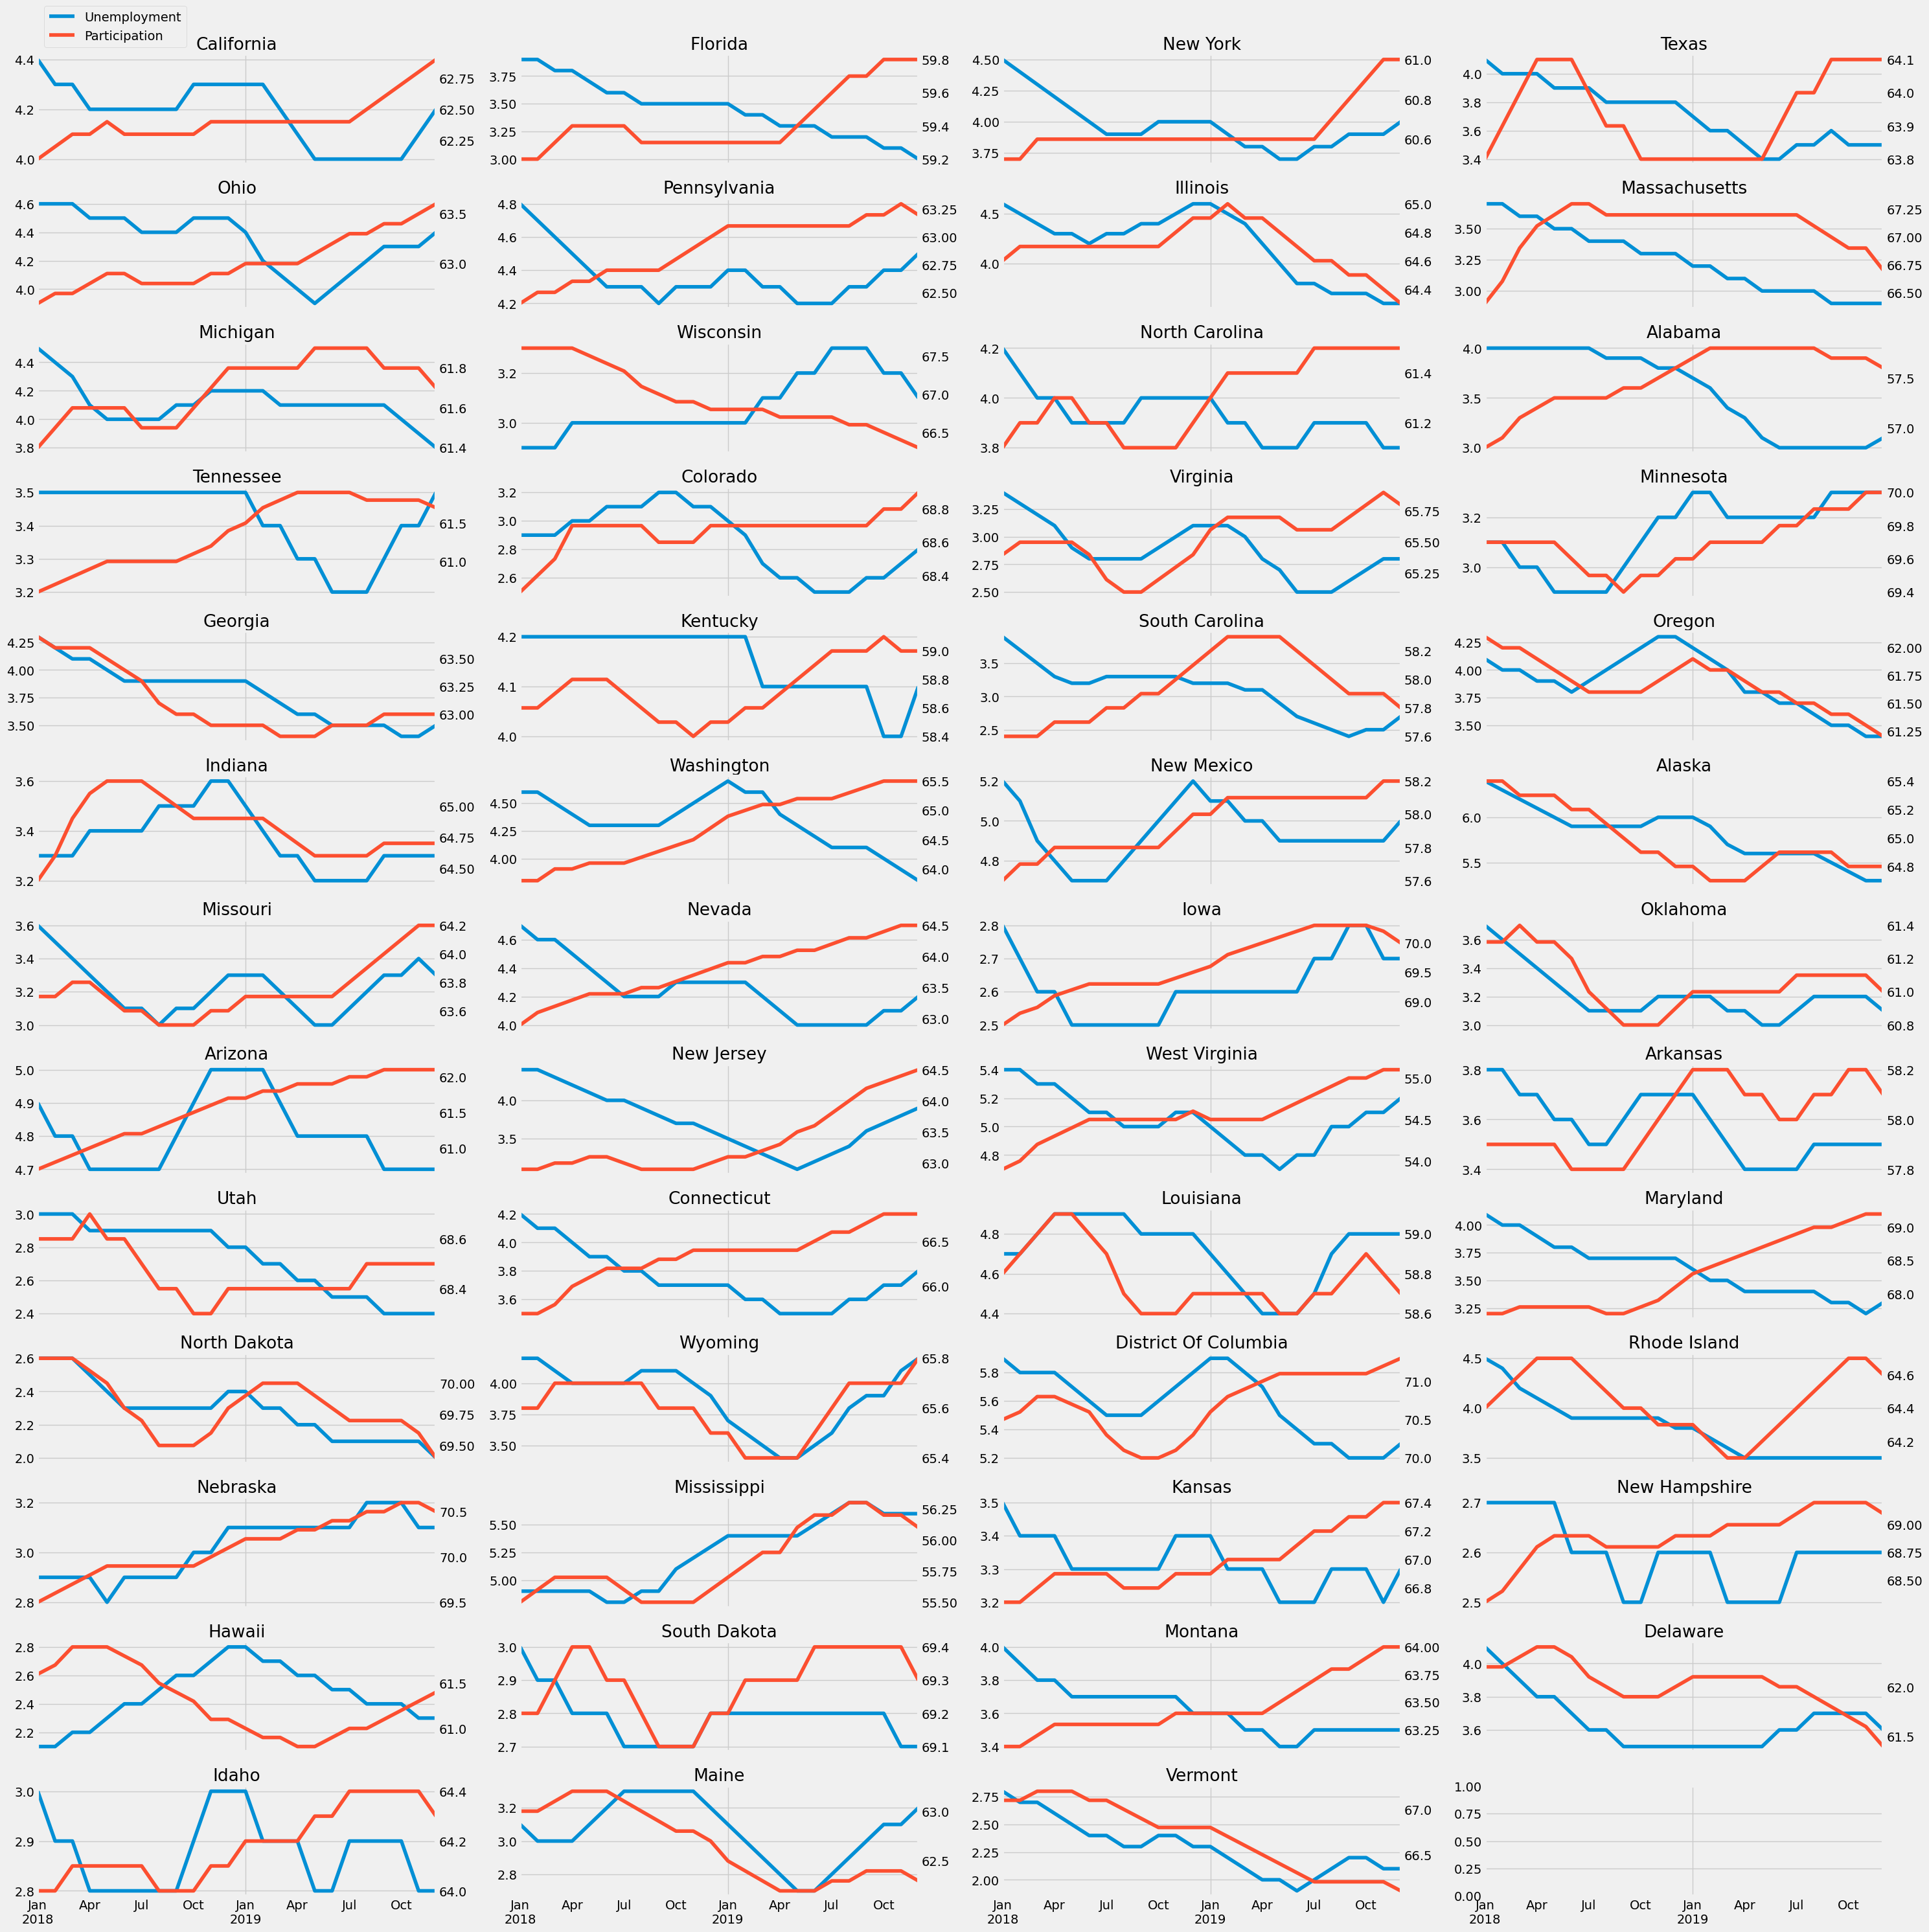

In [334]:
#Let's plot Unemployment vs Participation

fig, axs=plt.subplots(13,4,figsize=(30,30), sharex=True)
axs=axs.flatten()
i=0
for state in uemp_states.columns:
    if state =='Puerto Rico':
        continue
    ax2=axs[i].twinx()
    uemp_states.query('index >= 2018 and index <2020')[state].plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2018 and index <2020')[state].plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state, fontsize=19)

    # Create One legend for all the plots
    if i==0:
        handles, labels = axs[0].get_legend_handles_labels()
        handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the handles and labels
        all_handles = handles + handles2
        all_labels = labels + labels2

# Create a single legend with combined handles and labels
        plt.legend(all_handles, all_labels, loc='upper left',bbox_to_anchor=(0, 1.5))
        
    #if i==4:
    #    break
    i+=1
#plt.legend(loc='upper centre')
#fig.legend(loc='upper left')
plt.tight_layout()
plt.show()

_________________________________________________________
That's the end of the project I hope you liked it.

Have a good day :)